# 0. Import, Keep, Drop

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
loan = pd.read_pickle('all_data.pickle')

In [3]:
all_data = pd.read_pickle('all_data.pickle')

In [4]:
# 스케일링에 영향을 받지 않도록 따로 빼놓도록 하겠습니다.
depvar = loan['depvar'].astype('int8')
loan.drop('depvar', axis=1, inplace=True)

In [5]:
print('전체 열 개수:', len(loan.columns))

전체 열 개수: 54


In [6]:
print(sorted(loan.columns))

['acc_now_delinq', 'addr_state', 'annual_inc', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag1', 'delinq_2yrs', 'delinq_amnt', 'dti', 'elapsed_t', 'emp_length', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'home_ownership', 'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt', 'loan_amnt', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'open_acc', 'out_prncp', 'out_prncp_inv', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'recoveries', 'revol_bal', 'revol_util', 'tax_liens', 'term', 'tot_coll_amt', 'tot_cur_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'verification_status']


In [7]:
keep_list = ['loan_amnt','annual_inc','dti','fico_range_high', 
             'fico_range_low','inq_last_6mths','open_acc','pub_rec',
             'revol_bal', 'revol_util','total_acc','last_fico_range_high', 
             'last_fico_range_low','collections_12_mths_ex_med','acc_now_delinq',
             'tot_coll_amt','tot_cur_bal','chargeoff_within_12_mths',
             'delinq_amnt','pub_rec_bankruptcies','tax_liens','mths_since_last_delinq', 
             'mths_since_last_major_derog', 'mths_since_last_record', 
             'mths_since_rcnt_il','mths_since_recent_bc', 'mths_since_recent_bc_dlq', 
             'mths_since_recent_inq', 'mths_since_recent_revol_delinq','emp_length',
             'home_ownership','verification_status','purpose','addr_state']

In [8]:
print('사용할 열 개수:', len(keep_list))

사용할 열 개수: 34


In [9]:
drop_list = [col for col in loan.columns if col not in keep_list]

In [10]:
print('버릴 열 개수:', len(drop_list))

버릴 열 개수: 20


In [11]:
loan.drop(drop_list, axis=1, inplace=True)

In [12]:
loan.shape

(1092919, 34)

# 2. Pre-Processing

### * TODO

* 1. 데이터 불러오기
* 2. 변수 정리
    * 2-1. `fico_range_low`, `fico_range_high` 평균값을 `fico_score`에 저장하기
    * 2-2. `last_fico_range_low`, `last_fico_range_high` 평균값을 `last_fico_score`에 저장하기
    * 2-3. 수치형 데이터와 범주형 데이터 분리
* 3. 데이터 훑어보기
* 4. 수치형 데이터: 로그화, 정규화
* 5. 범주형 데이터: 더미변수 만들기
    * 5-1. `emp_length` 그룹화 (5년 미만: 1 / 5년 이상 10년 미만: 2 / 10년 이상: 3)
    * 5-2. home_ownership 재그룹 (ANY, NONE을 OTHER에 통합)
    * 5-3. 더미변수 만들기
    * 5-4. 결측치(emp_length의 NaN), 이상치(purpose의 educational, addr_state의 IA) 해당하는 더미 제거
* 6. 데이터 저장

### * 로그 전환 필요 변수 (log_변수명으로 생성)

`annual_inc`,`dti`,`revol_bal`,`revol_util`, `pub_rec`, `collections_12_mths_ex_med`, `acc_now_delinq`, `tot_coll_amt`, `chargeoff_within_12_mths`, `delinq_amnt`, `pub_rec_bankruptcies`, `tax_liens`, `mths_since_last_record`

### 2-1. `fico_score`생성

In [13]:
loan['fico_score'] = 0.5*loan['fico_range_low'] + 0.5*loan['fico_range_high']

In [14]:
loan.drop(['fico_range_low', 'fico_range_high'], axis=1, inplace=True)

### 2-2. `last_fico_score`생성

In [15]:
loan['last_fico_score'] = 0.5*loan['last_fico_range_low'] + 0.5*loan['last_fico_range_high']

In [16]:
loan.drop(['last_fico_range_low', 'last_fico_range_high'], axis=1, inplace=True)

### 2-3. 일부 변수 type변환

In [17]:
loan['mths_since_last_delinq'] = loan['mths_since_last_delinq'].astype('float64')
loan['mths_since_last_major_derog'] = loan['mths_since_last_major_derog'].astype('float64')
loan['mths_since_last_record'] = loan['mths_since_last_record'].astype('float64')
loan['mths_since_rcnt_il'] = loan['mths_since_rcnt_il'].astype('float64')
loan['mths_since_recent_bc'] = loan['mths_since_recent_bc'].astype('float64')
loan['mths_since_recent_bc_dlq'] = loan['mths_since_recent_bc_dlq'].astype('float64')
loan['mths_since_recent_inq'] = loan['mths_since_recent_inq'].astype('float64')
loan['mths_since_recent_revol_delinq'] = loan['mths_since_recent_revol_delinq'].astype('float64')

### 2-4. 수치형 데이터와 범주형 데이터 분리

범주형 변수: `emp_length`, `home_ownership`, `verification_status`, `purpose`, `addr_state`

In [70]:
cat_list = ['emp_length','home_ownership','verification_status','purpose','addr_state']
loan_cat = loan[cat_list]

In [19]:
num_list = [item for item in list(loan.columns) if item not in cat_list]
loan_num = loan[num_list]

# 3. 분포 확인

In [20]:
loan_num.describe()

,loan_amnt,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,...,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,fico_score,last_fico_score
count,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,...,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06
mean,1.364630e+04,7.562999e+04,1.818105e+01,6.401874e-01,1.157962e+01,2.278147e-01,1.633953e+04,5.311223e-01,2.472208e+01,1.791258e-02,...,2.771869e+00,1.512169e+00,9.439364e-01,1.910855e+00,5.312514e+00,1.382854e+00,4.651597e+00,1.920091e+00,6.962867e+02,6.711235e+02
std,8.441163e+03,8.994245e+04,8.321510e+00,9.343720e-01,5.429423e+00,6.400227e-01,2.264732e+04,2.389062e-01,1.186147e+01,1.514680e-01,...,3.414270e+00,2.870919e+00,2.375074e+00,3.122094e+00,2.971048e+00,2.774693e+00,3.265504e+00,3.107172e+00,3.061458e+01,1.007526e+02
min,1.000000e+03,3.000000e+03,-1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.620000e+02,0.000000e+00
25%,7.125000e+03,4.500000e+04,1.192000e+01,0.000000e+00,8.000000e+00,0.000000e+00,6.055000e+03,3.530000e-01,1.600000e+01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,6.720000e+02,6.270000e+02
50%,1.200000e+04,6.400000e+04,1.768000e+01,0.000000e+00,1.100000e+01,0.000000e+00,1.113500e+04,5.350000e-01,2.300000e+01,0.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,6.870000e+02,6.920000e+02
75%,1.900000e+04,9.000000e+04,2.410000e+01,1.000000e+00,1.400000e+01,0.000000e+00,1.975600e+04,7.150000e-01,3.100000e+01,0.000000e+00,...,6.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00,8.000000e+00,1.000000e+00,8.000000e+00,3.000000e+00,7.120000e+02,7.320000e+02
max,4.000000e+04,6.100000e+07,4.996000e+01,8.000000e+00,9.000000e+01,8.600000e+01,2.904836e+06,8.923000e+00,1.760000e+02,2.000000e+01,...,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,8.475000e+02,8.475000e+02


In [21]:
def box_plot(data, n_col, size = (20, 15), **title):

    n_list = len(data.columns)
    n = (int(n_list / n_col) + (n_list%n_col != 0))*n_col
    plt.figure(figsize=size)
    if title != None:
        plt.suptitle(title, fontsize=20)
    for idx, col in enumerate(data.columns):
        plt.subplot(n/n_col, n_col, idx + 1)
        plt.boxplot(data[col])
        plt.xlabel(col)
        plt.subplots_adjust(wspace=0.5, hspace=0.7)
    plt.show()

In [22]:
def hist_plot(data, n_col, size = (20, 15), **title):

    n_list = len(data.columns)
    n = (int(n_list / n_col) + (n_list%n_col != 0))*n_col
    plt.figure(figsize=size)
    if title != None:
        plt.suptitle(title, fontsize=20)
    for idx, col in enumerate(data.columns):
        plt.subplot(n/n_col, n_col, idx + 1)
        plt.hist(data[col], rwidth=0.8)
        plt.xlabel(col, fontsize=18)
        plt.xticks(rotation=45)
        plt.subplots_adjust(wspace=0.5, hspace=0.7)
    plt.show()

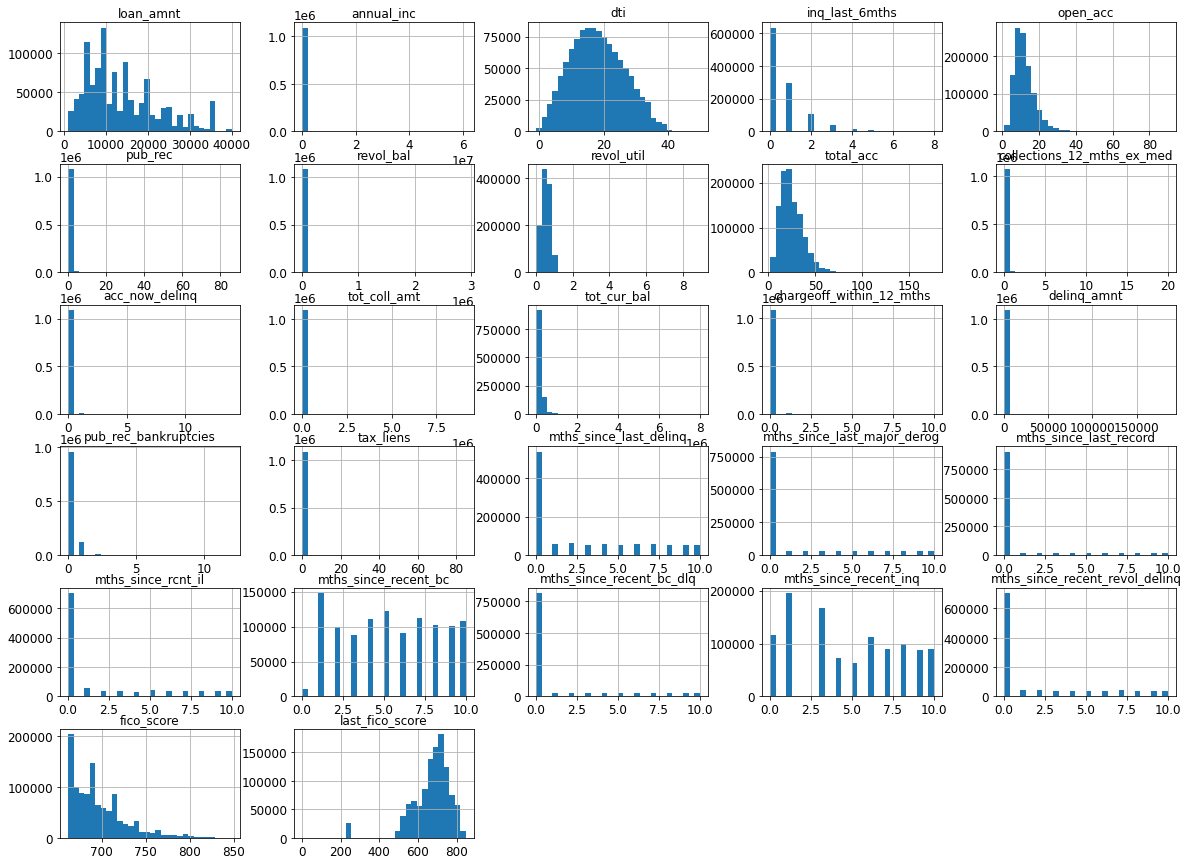

In [23]:
loan_num.hist(bins=30, figsize=(20,15))
plt.show()

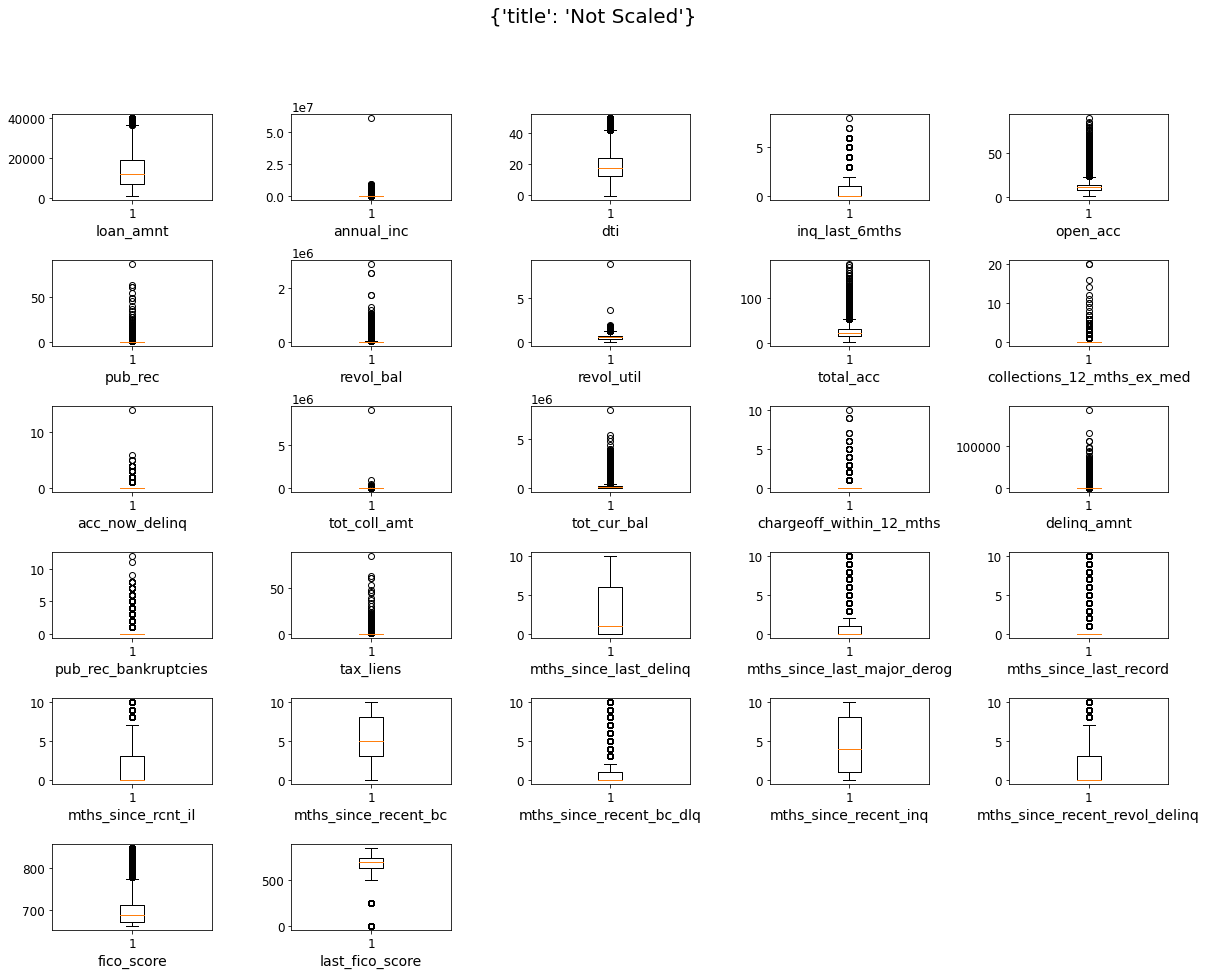

In [24]:
box_plot(loan_num, 5, title="Not Scaled")

# 4. 수치형 데이터 `loan_num` 스케일링

### 4.1. 이상치 제거

FICO사에 따르면, 신용점수를 의미하는 fico 점수는 300~850점의 범위를 갖습니다.  `last_fico_score`값이 0인 경우 결측치에 해당한다고 판단하고 이를 제거해주겠습니다.

In [25]:
zero_fico = loan_num[loan_num['last_fico_score']==0].index
loan_num.drop(index=zero_fico, axis=0, inplace=True)

### 4.2. 극단치 제거

입력된 변수의 최대값에서 일정 범위의 값들의 인덱스를 추출하여 이를 제거하는 함수를 만듭니다.

In [26]:
def remove_extremes(data, column_list, percent):
    ext_index = []
    for col in column_list:
        ext_value = data[col].max()
        condition = data[col] >= (ext_value * (1-percent))
        ext_index += (list(data[condition].index))
    remove_index = list(set(ext_index))
    print("Indices to remove:", remove_index)
    data.drop(index=remove_index, axis=0, inplace=True)
    print(f"{len(remove_index)}rows removed.")

In [27]:
len(loan_num)

1092751

In [28]:
extreme_columns = ['annual_inc','revol_util','acc_now_delinq','tot_coll_amt','tot_cur_bal','delinq_amnt', 'tax_liens']
remove_extremes(loan_num, extreme_columns, 0.01)

Indices to remove: [1029794, 829091, 733418, 331118, 286286, 524340, 722901]
7rows removed.


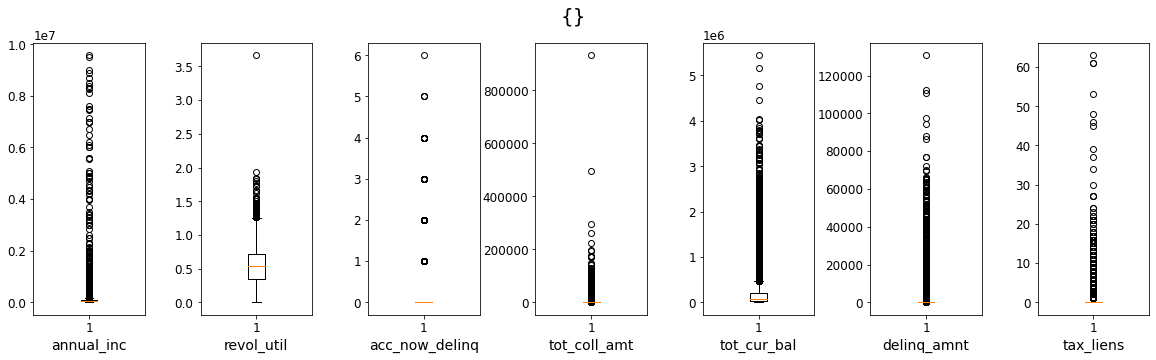

In [29]:
box_plot(loan_num[extreme_columns], 7, size=(20,5))

`revol_util`, `tot_coll_amt`에 대해 극단치를 더 제거해주겠습니다.

In [30]:
remove_extremes(loan_num, ['revol_util', 'tot_coll_amt'], 0.01)

Indices to remove: [684618, 385823]
2rows removed.


In [31]:
len(loan_num)

1092742

In [32]:
remove_extremes(loan_num, ['tot_coll_amt'], 0.01)

Indices to remove: [1048386]
1rows removed.


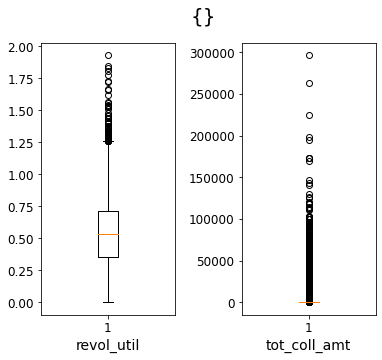

In [33]:
box_plot(loan_num[['revol_util', 'tot_coll_amt']], 2, size=(6,5))

### 4.3. 양의 왜도가 큰 변수 로그화

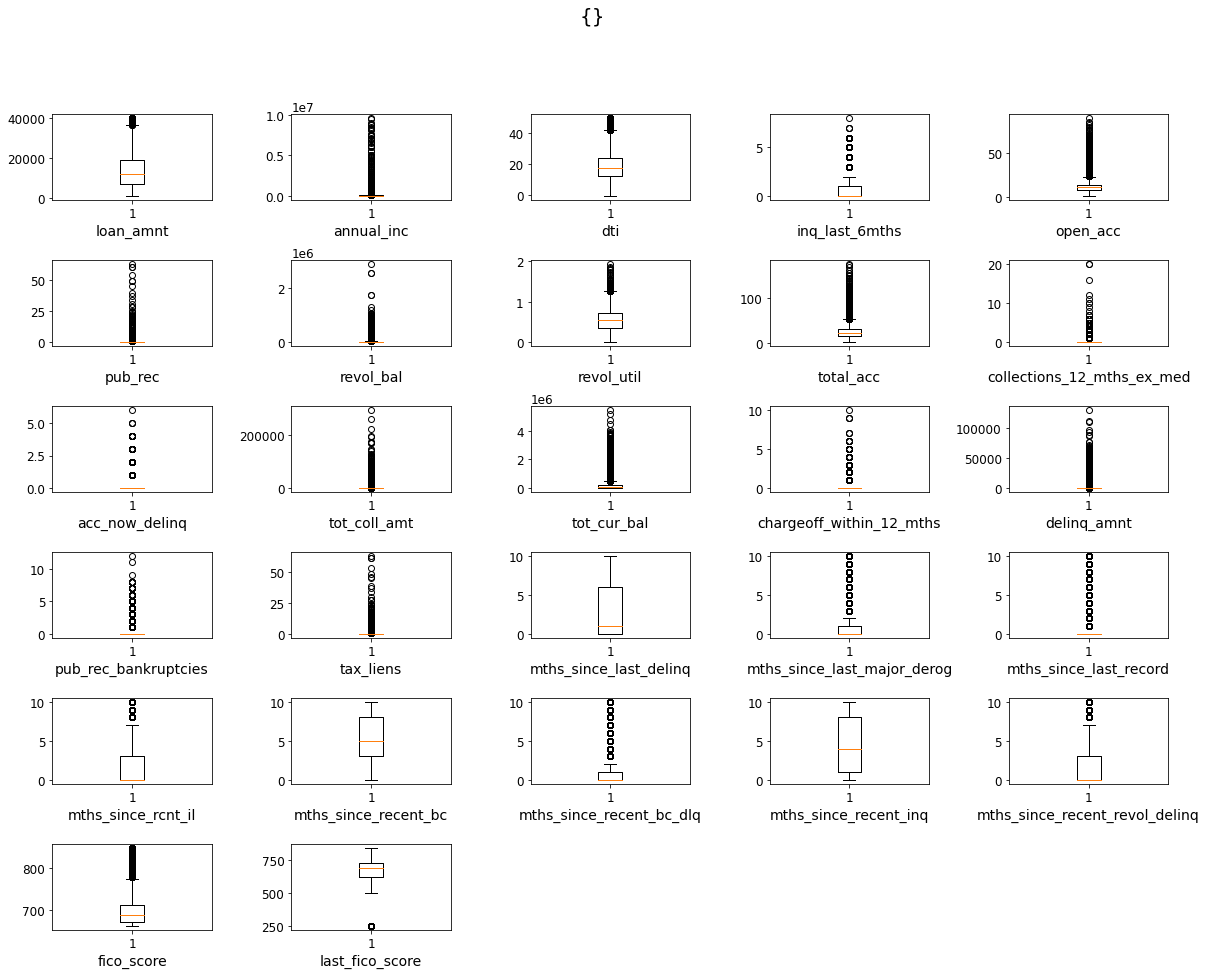

In [34]:
box_plot(loan_num, 5)

In [35]:
not_skewed = ['loan_amnt', 'int_rate', 'dti','mths_since_last_delinq','mths_since_recent_bc','mths_since_recent_inq']
skewed_list = [col for col in loan_num.columns if col not in not_skewed]

In [36]:
def make_log_value(data, column_list):
    for col in column_list:
        data[col] = data[col].apply(lambda x: np.log1p(x))

In [37]:
make_log_value(loan_num, skewed_list)

### 4.4. 정규화

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
result = scaler.fit_transform(loan_num)
loan_num_scaled = pd.DataFrame(data=result, index=loan_num.index, columns=loan_num.columns)
loan_num_scaled.aggregate(['mean','std','min','max'])

,loan_amnt,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,...,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,fico_score,last_fico_score
mean,6.222932e-14,1.221626e-14,3.460811e-16,2.577097e-13,1.896220e-14,2.740481e-13,-1.878201e-15,2.508064e-14,-2.630439e-14,8.116621e-14,...,-4.498917e-14,-2.516535e-13,-1.344345e-14,-2.011858e-12,-4.347039e-14,-3.523720e-14,-4.024000e-15,-1.013239e-13,-2.496147e-14,-1.240122e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.498163e+00,-5.652021e+00,-2.305014e+00,-7.825155e-01,-4.166907e+00,-4.344155e-01,-8.279684e+00,-2.573700e+00,-4.217748e+00,-1.266919e-01,...,-8.118613e-01,-5.847581e-01,-4.357423e-01,-6.881738e-01,-1.788089e+00,-5.517251e-01,-1.424459e+00,-6.926680e-01,-1.157977e+00,-5.099381e+00
max,3.122101e+00,9.219527e+00,3.818830e+00,3.867143e+00,4.914636e+00,1.259821e+01,5.067740e+00,4.119287e+00,4.215445e+00,3.230232e+01,...,2.117010e+00,2.313948e+00,3.016708e+00,2.017302e+00,1.577766e+00,2.436360e+00,1.637831e+00,2.008557e+00,4.614162e+00,1.301236e+00


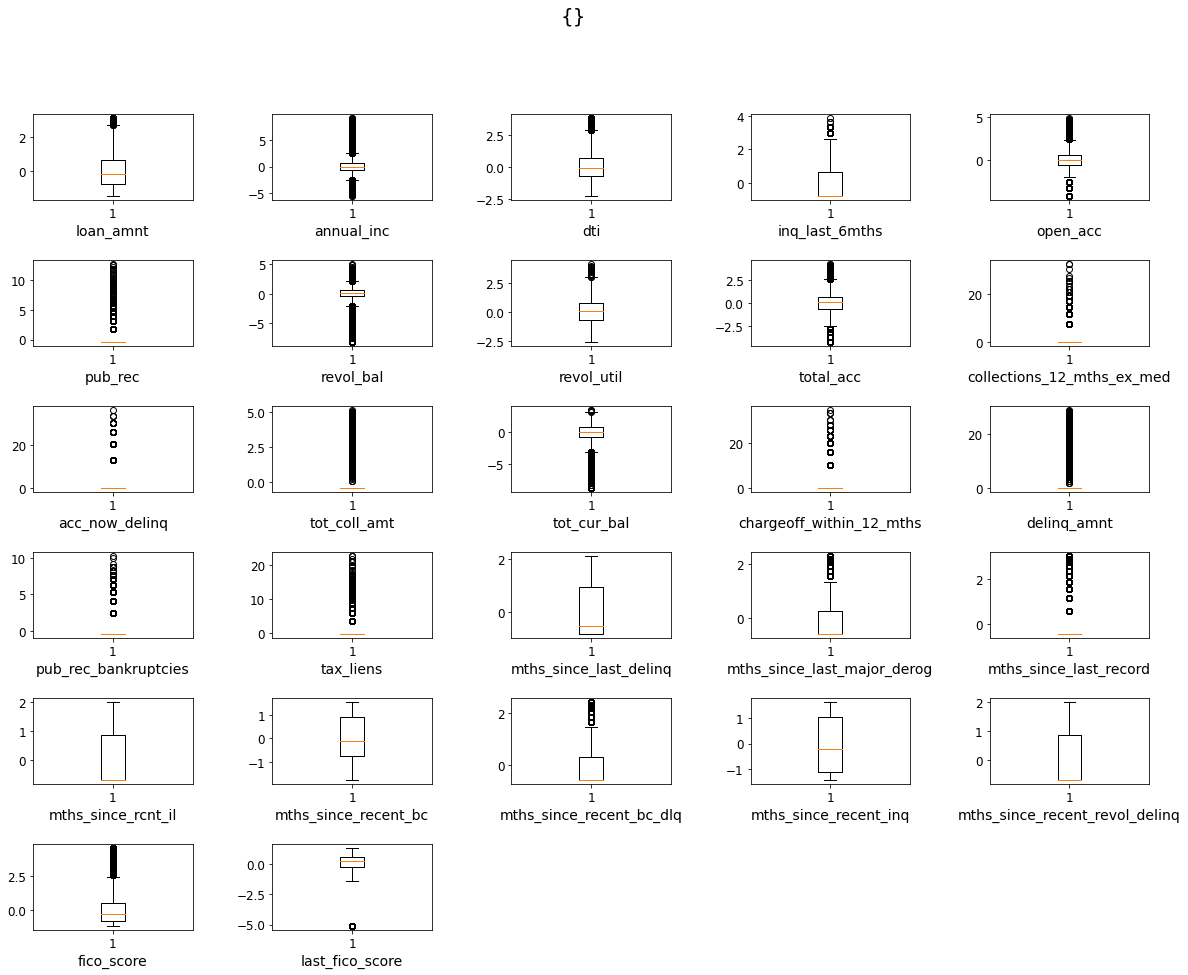

In [39]:
box_plot(loan_num_scaled, 5)

# 5. 범주형 데이터 `loan_cat` 더미변수 만들기

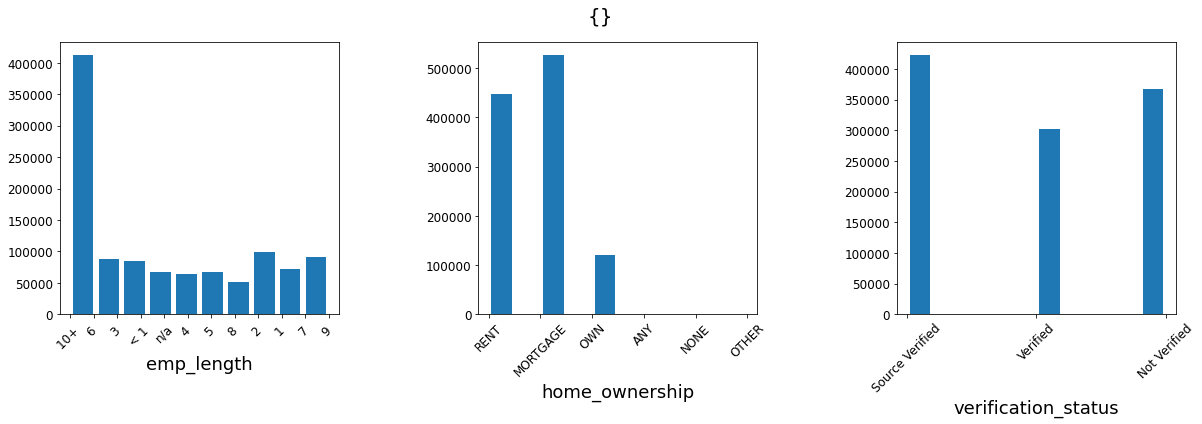

In [40]:
hist_plot(loan_cat.iloc[:,:-2], 3, size=(20,5))

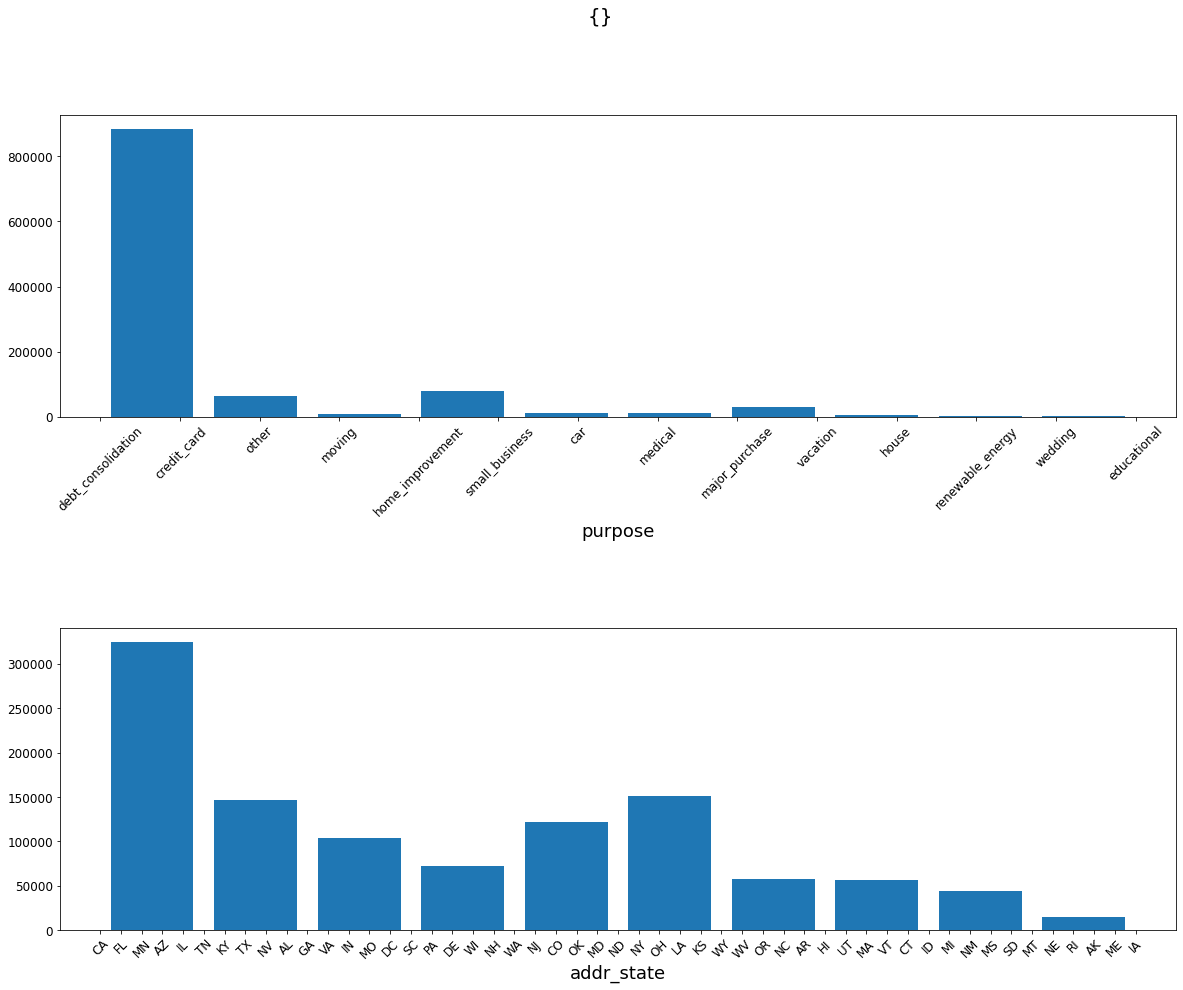

In [41]:
hist_plot(loan_cat.iloc[:,3:], 1, size=(20,15))

### 5-1. emp_length 그룹화
* 5년 미만: 1
* 5~10년 미만: 2
* 10년 이상: 3
* 결측치: 4

In [77]:
# 값을 기준으로 그룹화하기 위해 값들을 수치로 전환
loan_cat.emp_length.unique()

array(['10+ ', '6 ', '3 ', '< 1 ', 'n/a', '4 ', '5 ', '8 ', '2 ', '1 ',
       '7 ', '9 '], dtype=object)

In [78]:
loan_cat.emp_length.replace(['10+ ','< 1 ','n/a'], ['10 ', '0 ', np.nan], inplace=True)

In [79]:
def str_to_int(x):
    if pd.isna(x):
        return x
    else:
        return np.int8(x.split()[0])

In [80]:
loan_cat['emp_length'] = loan_cat.emp_length.apply(str_to_int)

In [81]:
loan_cat.emp_length.unique()

array([10.,  6.,  3.,  0., nan,  4.,  5.,  8.,  2.,  1.,  7.,  9.])

In [82]:
loan_cat['emp_length'] = pd.Series(np.digitize(loan_cat.emp_length, bins=[0, 5, 10,11])) 

In [98]:
emp = loan_cat.emp_length.value_counts()
emp

1    405112
3    360905
2    259993
4     66909
Name: emp_length, dtype: int64

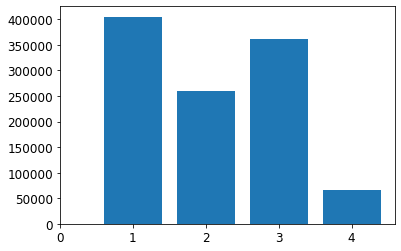

In [97]:
plt.bar(emp.index, emp.values)
plt.xticks([0,1,2,3,4])
plt.show()

### 5-2. home_ownership 재그룹

의미가 유사하므로 home_ownership의 값이 `ANY`, `NONE`인 데이터를 `OTHER`에 통합해줍니다.

In [102]:
loan_cat['home_ownership'].replace(['ANY','NONE'], 'OTHER', inplace=True)

In [103]:
home = loan_cat.home_ownership.value_counts()
home

MORTGAGE    525834
RENT        447039
OWN         119577
OTHER          469
Name: home_ownership, dtype: int64

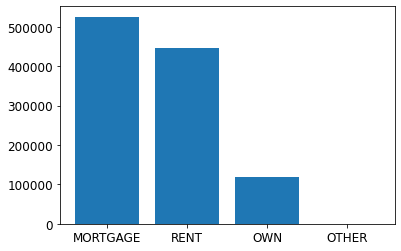

In [104]:
plt.bar(home.index, home.values)
plt.show()

### 5-3. 범주형 데이터의 더미변수 만들기

In [51]:
loan_cat = pd.get_dummies(loan_cat, columns=cat_list)

### 5-4. 결측치(emp_length의 NaN), 이상치(purpose의 educational, addr_state의 IA) 해당하는 더미 제거

In [52]:
loan_cat.drop(['emp_length_4','purpose_educational','addr_state_IA'], axis=1, inplace=True)
loan_cat_prepared = loan_cat

# 6. 데이터 병합 및 저장

종속변수`depvar`을 추가해줍니다.

In [53]:
loan_num_prepared = pd.merge(loan_num_scaled, depvar, left_index=True, right_index=True, how='inner')

In [54]:
# 데이터 호환성을 위해 열 순서 변경
depvar_removed = loan_num_prepared["depvar"]
loan_num_prepared.drop("depvar", axis=1, inplace=True)
loan_num_prepared.insert(25, "depvar", depvar_removed)

전처리가 완료된 수치형 데이터 `loan_num_prepared`와 범주형 데이터 `loan_cat_prepared`를 병합해줍니다.

In [55]:
loan_prepared = pd.merge(loan_num_prepared, loan_cat_prepared, left_index=True, right_index=True)

In [56]:
# a = pd.Series(loan_prepared.columns).to_csv("my_list.csv")

In [57]:
list_col = loan_prepared.columns
home = list_col[31:35]
verification = list_col[35:38]
purpo = list_col[38:51]
add = list_col[51:]
list_of = [home, verification, purpo, add]

In [58]:
def my(list):
    list_a = []
    for i in range(len(list)):
        new_name = list[i].replace(list[i].split('_')[-1],f'{i+1}')
        list_a.append(new_name)
    return list_a

In [59]:
home_ownership = my(home)
verification_status = my(verification)
purpose = my(purpo)
addr_state = my(add)
dict_a = {}
for i in range(len(home)):
    dict_a[home[i]] = home_ownership[i]
for i in range(len(verification)):
    dict_a[verification[i]] = verification_status[i]
for i in range(len(purpo)):
    dict_a[purpo[i]] = purpose[i]
for i in range(len(add)):
    dict_a[add[i]] = addr_state[i]

In [60]:
loan_prepared.rename(columns=dict_a, inplace=True)
loan_prepared.rename(columns ={"purpose_credit_2": "purpose_2",
                    "purpose_debt_3": "purpose_3",
                    "purpose_home_4": "purpose_4",
                    "purpose_major_6": "purpose_6", 
                    "purpose_renewable_10": "purpose_10", 
                    "purpose_small_11": "purpose_11"}, inplace=True)

기준열이 되는 더미변수 삭제  


`emp_length`, `purpose`, `addr_state`에서 각각 결측치와 이상치에 해당하는 기준 더미변수를 하나씩 삭제하였으므로 `home_ownership`, `verification_status`에서만 처리해주겠습니다.

In [61]:
loan_prepared.drop(['home_ownership_2', 'verification_status_1'], axis = 1, inplace = True) 

In [62]:
loan_prepared.rename(columns ={"home_ownership_3": "home_ownership_2",
                    "home_ownership_4": "home_ownership_3",
                    "verification_status_2": "verification_status_1",
                    "verification_status_3": "verification_status_2"}, inplace=True)

In [63]:
loan_prepared.to_pickle('loan_prepared.pickle')